# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [376]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [378]:
#importing the datasets
#count_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/capstone/count_data.csv')
#song_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/song_data.csv')

count_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [379]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [380]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Obvservations**


* count df has an unnamed:0 column that seems like a redudnant index we can remove. otherwise it's straightforward with user and song ID strings and a play count numeric value associated for each user & song pair.
* Song df has more information about each song, with the unique song ID identifier and then further information on the song, artist album it came out in, etc.



### **Let us check the data types and and missing values of each column**

In [381]:
print("The number of unique users in count df is",count_df['user_id'].nunique())
print("The number of unique songs in song df is",count_df['song_id'].nunique())

The number of unique users in count df is 76353
The number of unique songs in song df is 10000


In [382]:
count_df.shape

(2000000, 4)

In [383]:
song_df.shape

(1000000, 5)

In [384]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [385]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [386]:
song_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000000.0,1030.325652,998.745002,0.0,0.0,1969.0,2002.0,2011.0


**Observation**
It seems like we have some 0 values in the year - may want to clean this up later on if we wanted to use year to recommend songs to users (e.g. someone who only seems to like oldies, or someone who only likes new songs)

In [387]:
count_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000000.0,999999.500000,577350.413528,0.0,499999.75,999999.5,1499999.25,1999999.0
play_count,2000000.0,3.045485,6.579720,1.0,1.00,1.0,3.00,2213.0


**Observation**
Most songs appear to be played between 1-3 times with some outlier(s) of over 2k times. This may skew the data (e.g. if we recommend based on # of plays) so we may want to look into this to adjust accordingly.

In [388]:
#checking for duplicate entries in song df. We should be able to drop duplicate entries
song_df[song_df.duplicated()]

,song_id,title,release,artist_name,year
18309,SOPFBUZ12AF729C896,Spitting Games,Final Straw,Snow Patrol,2003
32760,SOJHKXX12A8C139798,A Crow Left Of The Murder,Live in Malaysia 2004,Incubus,2004
54218,SONVJUL12A6701FB7A,The Damage In Your Heart,Make Believe,Weezer,2005
73174,SORBGBD12A8C141CEA,Weight Of The World,The Open Door,Evanescence,2006
83415,SONLOQQ12A8C139AF9,Go To Sleep,Hail To The Thief,Radiohead,2003
...,...,...,...,...,...
997476,SOCGXXL12B0B808865,Yesterdays,Greatest Hits,Guns N' Roses,1991
998785,SOEUIVS12A8C1400E3,Someone Put Your Hand Out,King Of Pop,Michael Jackson,1992
999365,SORANLE12A6310DBC8,Long Way To Go,Love Angel Music Baby,Gwen Stefani / Andre 3000,0
999643,SOAPUFN12AB017FF03,Suggestions,System Of A Down (Bonus Pack),System of a Down,1998


In [389]:
#Just checking one example of a duplicated song
song_df.loc[song_df['song_id'] == 'SODNVTM12A6D4FA448']


,song_id,title,release,artist_name,year
766340,SODNVTM12A6D4FA448,Ruled By Secrecy,Absolution,Muse,0
999740,SODNVTM12A6D4FA448,Ruled By Secrecy,Absolution,Muse,0


In [390]:
song_df.drop_duplicates()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


#### **Observations and Insights:_____________**
* We got rid of duplicate entires in the song data frame 
* Identified an unnamed 0 column in the song dataframe that can be dropped

**Other data obvervations were:**
* We saw some "zero" entries in the year value of the song release date
* Play counts are typically <5 but saw some potential outliers

In [391]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
count_song_df=pd.merge(count_df,song_df,on="song_id",how="inner")

In [392]:
# Drop the column 'Unnamed: 0'
count_song_df=count_song_df.drop(columns=['Unnamed: 0'])

count_song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 127.4+ MB


In [393]:
count_song_df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_count,2086946.0,3.031582,6.550493,1.0,1.0,1.0,3.0,2213.0
year,2086946.0,1636.512499,772.409985,0.0,1985.0,2003.0,2007.0,2010.0


In [394]:
count_df.loc[count_df['play_count'] > 1000]

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


In [395]:
#this seems to be an outlier for playcount, as the 75th percentile is 3 so couldl choose later on to remove it
#count_df = count_df[count_df['play_count']<1000]

**Observation**
This user/song play count of 2k+ seems to be an outlier for playcount, as the 75th percentile is 3. Could choose later on to remove it

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

The `user_id` and `song_id` are encrypted and don't hold much meaning in their string values so we can encode them into a simple numeric feature for clarity 



In [396]:
# Apply label encoding for "user_id" and "song_id"

#LabelEncoder
from sklearn import preprocessing
ule = preprocessing.LabelEncoder()
sle = preprocessing.LabelEncoder()
users_enc=ule.fit_transform(count_song_df.user_id)
songs_enc=sle.fit_transform(count_song_df.song_id)

In [397]:
#create a new DF where we will replace w the encoded ones
count_song_copy_df= count_song_df.copy()
count_song_df['user_id']=users_enc
count_song_df['song_id']=songs_enc

count_song_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,37056,153,1,The Cove,Thicker Than Water,Jack Johnson,0
2,35091,153,3,The Cove,Thicker Than Water,Jack Johnson,0
3,10905,153,1,The Cove,Thicker Than Water,Jack Johnson,0
4,18917,153,6,The Cove,Thicker Than Water,Jack Johnson,0


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

We will remove users with a low song play count and songs with few user interactions for efficiency in building the recommendation systems since we won't be able to derive enough information from songs or users with low play counts (it could be that people don't like them but it may also be they are new to the system!)

In [398]:
# Get the column containing the users
users = count_song_df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [399]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = count_song_df.loc[~count_song_df.user_id.isin(remove_users)]

In [400]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [401]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [402]:
counted = count_df.groupby('play_count').count()['user_id'].to_frame()

## **Exploratory Data Analysis**

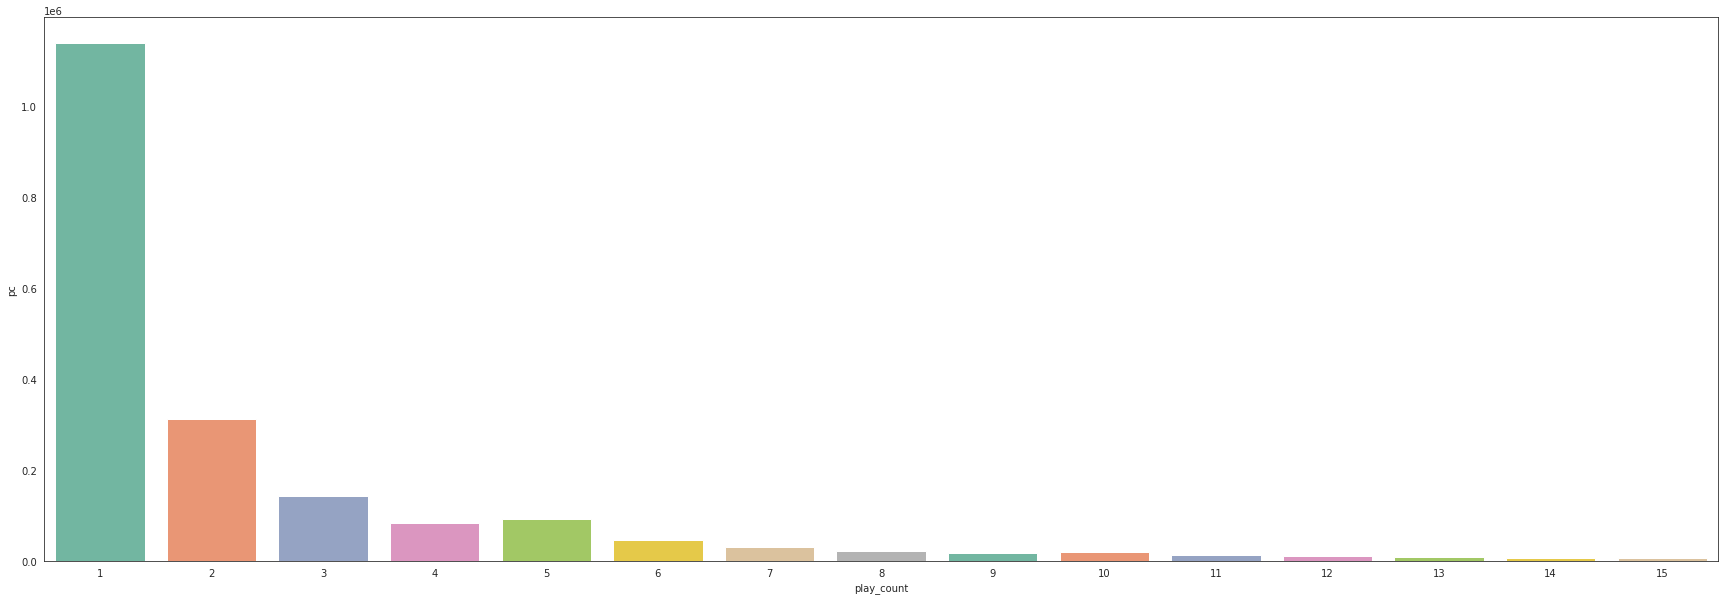

In [403]:
counted = counted.head(15)
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.barplot(x = counted.index,
            y = 'user_id',
            data = counted,
            estimator = np.median,
            palette="Set2")
plt.ylabel('pc') 
# Show the plot
plt.show()

In [404]:
df_final.shape

(170214, 7)

In [405]:
# Drop records with play_count more than(>) 5
df_final= df_final[df_final["play_count"] <= 5]

#personally not a big fan of this recommendation - if we are trying to use play count as rating, 
#then we could map play_count to 1-5 range, or even simply set that anything over a rating of 5=5
#dropping those rows doesn’t make as much sense to me at this point. 
#Since this what seems to be recommended as a guidelinein the notebook I will do that
#but may consider changing it for the next one
#and will make sure to update the rating scale and threshold values accordingly

In [420]:
df_final.shape

(154377, 7)

Then again we still retain over 90% of rows with play counts

In [421]:
# Some more data observations for clarity, picking Muse as an example
muse_df = df_final[df_final['artist_name']=='Muse']
muse_df.head(10)


,user_id,song_id,play_count,title,release,artist_name,year
206874,56576,208,1,Uprising,Uprising,Muse,0
206875,49549,208,3,Uprising,Uprising,Muse,0
206878,8074,208,2,Uprising,Uprising,Muse,0
206889,37938,208,3,Uprising,Uprising,Muse,0
206897,9097,208,2,Uprising,Uprising,Muse,0
206899,19193,208,1,Uprising,Uprising,Muse,0
206904,23297,208,2,Uprising,Uprising,Muse,0
206907,38362,208,2,Uprising,Uprising,Muse,0
206911,41101,208,3,Uprising,Uprising,Muse,0
206917,26149,208,2,Uprising,Uprising,Muse,0


In [425]:
# we can see how much each song has been played
muse_df[['title','play_count']].groupby(['title'],sort=True).sum()

,play_count
title,
Can't Take My Eyes Off You,158
Do We Need This?,234
Invincible,230
Map Of The Problematique,368
Resistance,576
Starlight,218
Stockholm Syndrome,270
Supermassive Black Hole (Album Version),912
Supermassive Black Hole (Twilight Soundtrack Version),912


### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [409]:
# Display total number of unique user_id
print("The number of unique users in count df is",df_final['user_id'].nunique())

The number of unique users in count df is 3476


Total number of unique song id

In [410]:
# Display total number of unique song_id
print("The number of unique songs in count df is",df_final['song_id'].nunique())

The number of unique songs in count df is 695


Total number of unique artists

In [411]:
# Display total number of unique artists
print("The number of unique songs in count df is",df_final['artist_name'].nunique())

The number of unique songs in count df is 258


#### **Observations and Insights:__________**

After cleaning up the data we have **3476** users, and **695** which could yield about **2M** "play counts" 


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

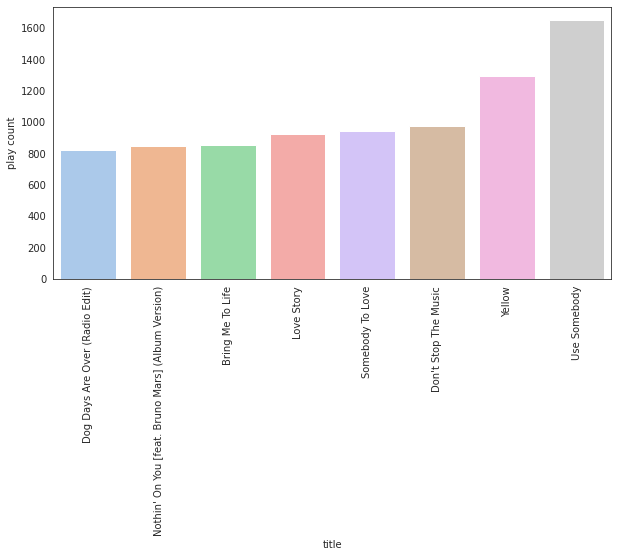

In [426]:
count_titles = df_final.groupby('title').count()['play_count'].to_frame().sort_values(by='play_count')
count_t = pd.DataFrame(count_titles)
#count.drop(count.index[0], inplace=True)
count_t = count_t.tail(8)

plt.figure(figsize=(10,5))
sns.barplot(x = count_t.index,
            y = 'play_count',
            data = count_t,
            estimator = np.sum,
            palette='pastel')
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.ylabel('play count') 
# Show the plot
plt.show()

Users who play the most songs


In [413]:
count_users = df_final.groupby('user_id').sum()['play_count'].to_frame().sort_values(by='play_count')
count_u = pd.DataFrame(count_users)
#count.drop(count.index[0], inplace=True)
count_u = count_u.tail(10)
count_u

,play_count
user_id,
23337,444
27401,458
61472,458
43041,469
75144,473
62759,485
37049,485
15733,508
31704,515



Users with the most interactions

In [414]:
df_final['user_id'].value_counts().to_frame().head(10)

,user_id
61472,311
37049,267
15733,243
75144,237
9570,212
10763,210
23337,204
31704,201
43041,200
37851,197


In [415]:
count_users = df_final.groupby('user_id').sum()['play_count'].to_frame().sort_values(by='play_count')
count_u = pd.DataFrame(count_users)
#count.drop(count.index[0], inplace=True)
count_u = count_u.tail(10)
count_u

,play_count
user_id,
23337,444
27401,458
61472,458
43041,469
75144,473
62759,485
37049,485
15733,508
31704,515


Songs released in a year

In [416]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,9515
2007,17510
2008,18619
2009,19856
2010,5541


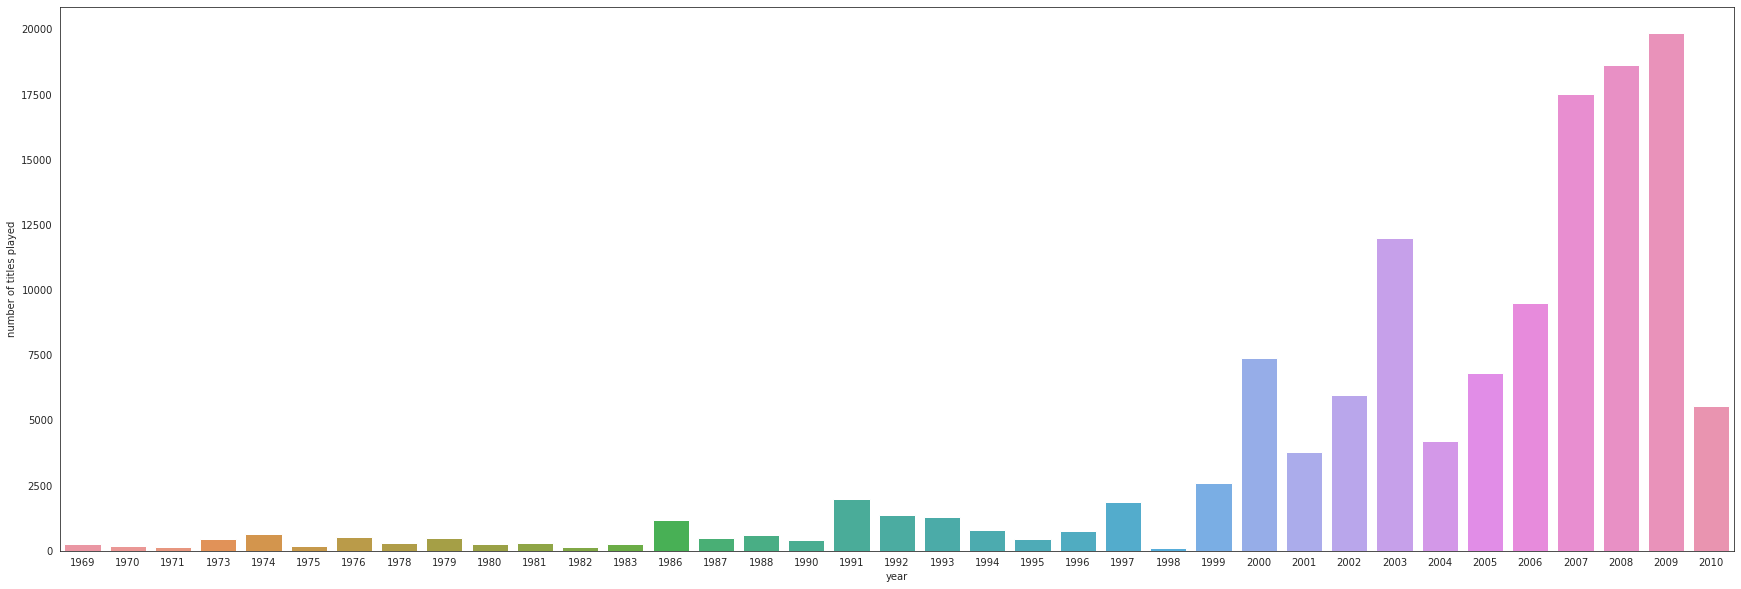

In [417]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

In [418]:
# most played artists
count_songs = df_final.groupby('artist_name').count()['play_count'].to_frame().sort_values(by='play_count', ascending=False)
count = pd.DataFrame(count_songs)
#count.drop(count.index[0], inplace=True)
count.head()

,play_count
artist_name,
Coldplay,6785
Kings Of Leon,6210
The Killers,4776
The All-American Rejects,3286
Florence + The Machine,3097


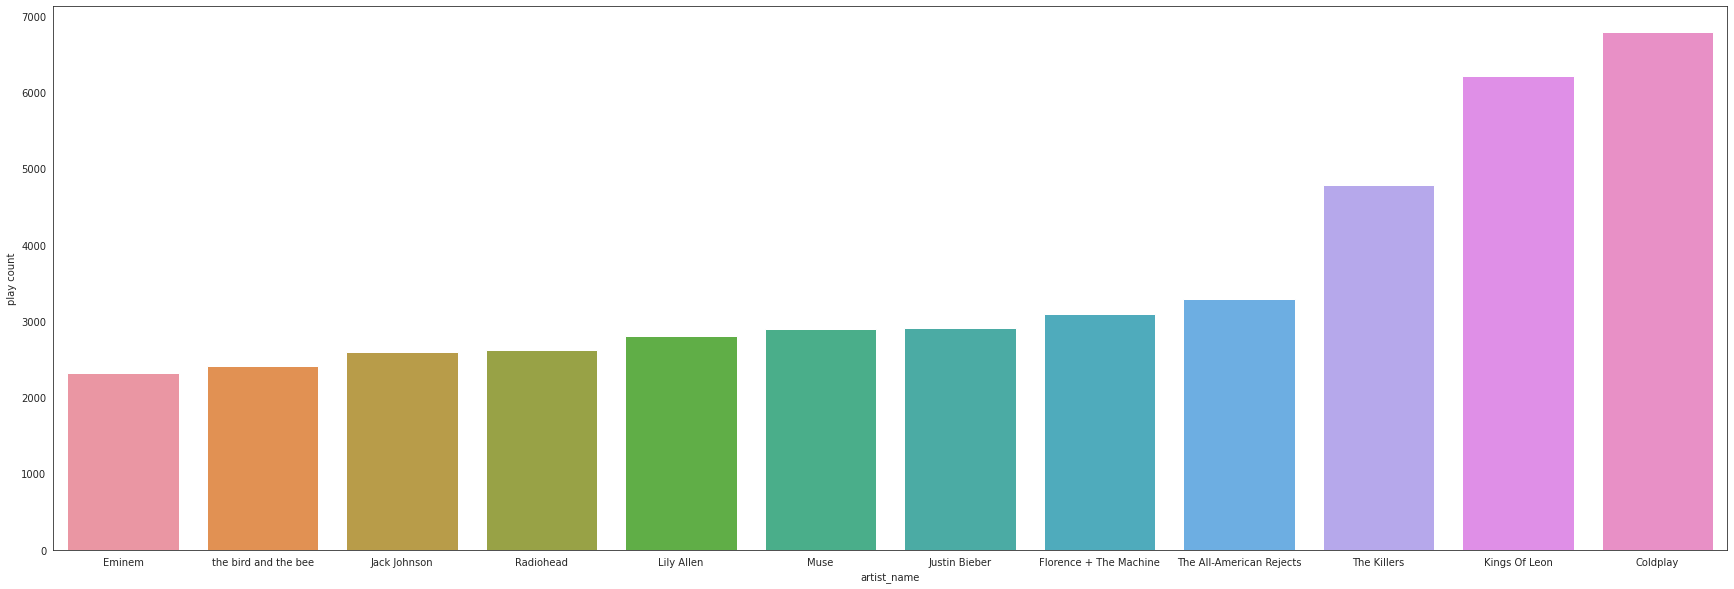

In [419]:
count_artists = df_final.groupby('artist_name').count()['play_count'].to_frame().sort_values(by='play_count')
count_a = pd.DataFrame(count_artists)
#count.drop(count.index[0], inplace=True)
count_a = count_a.tail(12)

plt.figure(figsize=(30,10))
sns.barplot(x = count_a.index,
            y = 'play_count',
            data = count_a,
            estimator = np.sum)
plt.ylabel('play count') 
# Show the plot
plt.show()

#### **Observations and Insights:__________** # 
* Florence and the Machine and Coldplay are hands-down the most played artists
* We can derive other interesting insights from the data, about the songs, artists, albums, like which year were most songs in the data released, what are the artists with most songs, etc
* Most artists in the top list I'm familiar with with some exceptions (like Harmonia). Some quick online research doesn't seem also to suggest they should be some of the top artists (not that I would know all of them) but good to keep in mind later on for sanity check

**Think About It:** What other insights can be drawn using exploratory data analysis?

other things we could look at would be
* 10 most played albums  (not by play count but by user)
* Artist with the most songs

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
We will explore different recommendation systems models, from simple to more complex such as:
Popularity-Based Recommendation Systems
User-User Similarity-Based Collaborative Filtering
Model Based Collaborative Filtering - Matrix Factorization
Cluster & Content Based Recommendation System
If time permits, hybrid or deep content based


**Overall solution design** - What is the potential solution design?<br>

* Build the recommendation systems proposed above to find the top 'n' songs for a user
* We will use the Surprise library in python to build similarity based collaborative filtering. 
* Implement the matrix factorization approach applying SVD to predict play counts
* Create a function to recommend songs to the users based on predicted play counts for each song.
* Perform hyperparameter tuning of the models using GridSearchCV
* Use precision@k, recall@k, F1-Score@k and RMSE as metrics for model performance evaluation

**Measures of success**- What are the key measures of success to compare different potential technqiues?<br>
We will be looking at 
* precision@k 
* recall@k 
* F_1 score (using above)
* RMSE

**Some definitions**
Relevant item - An item (song in this case) that is actually rated higher than the threshold rating (here 1.5) is relevant, if the actual rating is below the threshold then it is a non-relevant item.
Recommended item - An item that's predicted rating is higher than the threshold (here 1.5) is a recommended item, if the predicted rating is below the threshold then that song will not be recommended to the user.

False Negative (FN) - It is the frequency of relevant items that are not recommended to the user. If the relevant items are not recommended to the user, then the user might not find new songs they enjoy to play.
This would result in the user navigating away from the platform or simply having an “un pleasurable” music experience and not trusting the service for music recommendations.

False Positive (FP) - It is the frequency of recommended items that are actually not relevant. In this case, the recommendation system is not doing a good job of finding and recommending relevant songs to the user. This would result in inefficient use of resources from the service provided which they would also like to minimize.

Recall - It is the fraction of actually relevant songs that are recommended to the user i.e. if out of 10 relevant songs, 6 are recommended to the user then recall is 0.60. The higher the value of recall the better our mode is.

Precision - It is the fraction of recommended songs that are actually relevant i.e. if out of 10 recommended songs, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. 
